In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load results

In [8]:
results_df = pd.read_csv('./results/experiment_5.csv')
results_df.head()

,epoch,time,train_loss,val_loss,train_ppl,val_ppl,val_bpc,train_bpc,memalloc_Gb,memcache_Gb,max_memalloc_Gb,max_memcache_Gb,asgd_triggered
0,1,388.912852,6.508866,6.512987,671.064676,673.836395,9.396255,9.390308,0.431330,4.879286,4.755397,4.879286,False
1,2,391.462797,6.423655,6.432876,616.251376,621.960343,9.280679,9.267375,0.351639,4.879286,4.755397,4.879286,False
2,3,389.818821,6.345110,6.361315,569.699979,579.007272,9.177438,9.154059,0.351639,4.879286,4.755397,4.879286,False
3,4,389.294408,6.256032,6.277458,521.147163,532.433679,9.056458,9.025547,0.351639,4.879286,4.755397,4.879286,False
4,5,386.238709,6.158435,6.182516,472.687861,484.208913,8.919486,8.884744,0.351639,4.879286,4.755397,4.879286,False


## Plot training curves

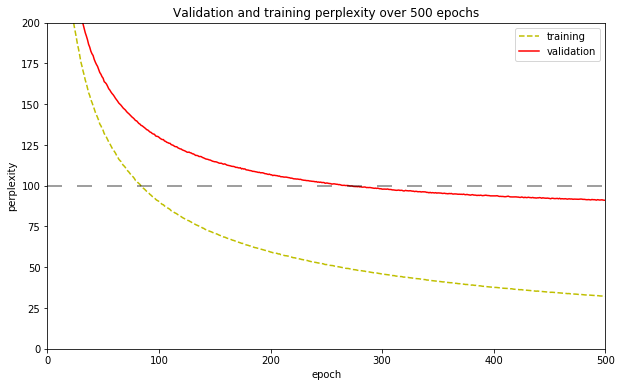

In [68]:
def plot_results(df, title):
    plt.figure(figsize=(10,6))
    
    plt.plot(df['epoch'], df['train_ppl'], 'y--', label='training')
    plt.plot(df['epoch'], df['val_ppl'], 'r', label=f'validation')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.xlabel('epoch')
    plt.ylabel('perplexity')
    plt.axhline(100, color='black', alpha=0.5, dashes=(10., 10.))
    
    plt.axis([0, 500, 0, 200]);
    

plot_results(results_df, 'Validation and training perplexity over 500 epochs')

## What was best performance?

In [67]:
best_result = results_df[results_df['val_ppl'] == results_df['val_ppl'].min()]
best_result

,epoch,time,train_loss,val_loss,train_ppl,val_ppl,val_bpc,train_bpc,memalloc_Gb,memcache_Gb,max_memalloc_Gb,max_memcache_Gb,asgd_triggered
499,500,397.330289,3.47106,4.511274,32.170815,91.037744,6.508393,5.007681,0.522186,4.957405,4.847302,4.957405,True


In [72]:
print(f'lowest perplexity: {results_df["val_ppl"].min()}')

lowest perplexity: 91.03774439999424
